# Intro

## 🧁 Diabetes Classification – Multiple ML Models

## 📌 Overview
This project tackles a **Diabetes classification problem** using a real-world dataset. The goal is to predict whether a patient has diabetes based on medical features and lifestyle indicators. 

The task is approached using **multiple machine learning models** and **various feature scaling techniques**, allowing us to identify the optimal pipeline for predictive accuracy and clinical reliability.

---

## 📁 Dataset Description:


| Column | Description | Values / Meaning |
|------|------------|------------------|
|` Diabetes_binary `| Indicates whether the person has diabetes | 0 = No diabetes, 1 = Diabetes |
|`HighBP` | Whether the person has high blood pressure | 0 = No, 1 = Yes |
|`HighChol` | Whether the person has high cholesterol | 0 = No, 1 = Yes |
|`CholCheck` | Whether cholesterol was checked in the last 5 years | 0 = No, 1 = Yes |
|`BMI` | Body Mass Index | Continuous numeric value |
|`Smoker` | Has smoked at least 100 cigarettes in lifetime | 0 = No, 1 = Yes |
|`Stroke` | History of stroke | 0 = No, 1 = Yes |
|`HeartDiseaseorAttack` | History of heart disease or heart attack | 0 = No, 1 = Yes |
|`PhysActivity` | Physical activity in past 30 days | 0 = No, 1 = Yes |
|`Fruits` | Consumes fruit 1 or more times per day | 0 = No, 1 = Yes |
|`Veggies` | Consumes vegetables 1 or more times per day | 0 = No, 1 = Yes |
|`HvyAlcoholConsump` | Heavy alcohol consumption | 0 = No, 1 = Yes |
|`AnyHealthcare` | Has any kind of health care coverage | 0 = No, 1 = Yes |
|`NoDocbcCost` | Could not see a doctor due to cost | 0 = No, 1 = Yes |
|`GenHlth` | General health self-rating | 1 = Excellent → 5 = Poor |
|`MentHlth` | Days of poor mental health in last 30 days | 0–30 days |
|`PhysHlth` | Days of poor physical health in last 30 days | 0–30 days |
|`DiffWalk` | Difficulty walking or climbing stairs | 0 = No, 1 = Yes |
|`Sex` | Gender | 0 = Female, 1 = Male |
|`Age` | Age group category | 1 = 18–24 → 13 = 80+ |
|`Education` | Education level | 1 = Never attended school → 6 = College graduate |
|`Income` | Income category | 1 = < $10k → 8 = > $75k |

📌 Dataset Source: [Diabetes Classification Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv)

## 🔍 Exploratory Data Analysis (EDA)
* **Class Distribution Analysis:** Checking for class imbalance in the target variable to decide on resampling strategies.
* **Correlation HeatMapping:** Identifying strong predictors (e.g., the link between `BMI`, `HighBP`, and `Diabetes`).
* **Feature Profiling:** Analyzing the impact of lifestyle choices like `Fruits` and `Veggies` consumption on diabetic outcomes.
* **Class Balance Verification:** A critical check of the `Diabetes_binary` distribution. In medical datasets, non-diabetic cases often significantly outnumber diabetic ones, requiring a strategy to handle this skew.

---

## 🏗️ Pipeline Model
Since the majority of the features are binary or pre-categorized, **feature scaling (like StandardScaler) is not required**. The pipeline is streamlined for efficiency:
* **Step 1:** Data validation to ensure input types match the model requirements.
* **Step 2:** Model training using algorithms that naturally handle binary and ordinal data.
* **Step 3:** Hyperparameter optimization via `RandomizedSearchCV` to find the best model configuration.

---

## 🤖 ML Models Trained
Several classification models were trained and benchmarked:

| Model | Description | Key Strength |
| :--- | :--- | :--- |
| **Logistic Regression** | Linear model for classification | Highly interpretable and fast. |
| **K-Nearest Neighbors** | Distance-based classifier | Excellent at capturing local patterns. |
| **SVM** | Support Vector Machine | High accuracy in high-dimensional spaces. |
| **Decision Tree** | Tree-based model | Visualizes decision logic clearly. |
| **Naive Bayes** | Probabilistic classifier | Highly efficient and works well with independence assumptions. |
| **Random Forest** | Ensemble of decision trees | Robust and reduces overfitting. |


---

## ⚖️ Benchmark & Evaluation
The models were evaluated using a comprehensive suite of metrics:
* **Accuracy:** The overall percentage of correct predictions.
* **Precision & Recall:** Critical for medical tasks—Recall ensures we minimize "False Negatives" (missing a diabetic patient).
* **F1-Score:** The harmonic mean of Precision and Recall.
* **ROC-AUC Score:** Measuring the model's ability to distinguish between classes across all thresholds.
---




## Expolratory Data Analysis ''EDA''

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import data

In [23]:
df = pd.read_csv(r"../Data/diabetes.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Remap the data for EDA

In [3]:
label_maps = {
    "Diabetes_binary": {
        0: "No Diabetes",
        1: "Diabetes"
    },
    "HighBP": {
        0: "No High BP",
        1: "High BP"
    },
    "HighChol": {
        0: "No High Cholesterol",
        1: "High Cholesterol"
    },
    "CholCheck": {
        0: "No Chol Check",
        1: "Chol Checked"
    },
    "Smoker": {
        0: "Non-Smoker",
        1: "Smoker"
    },
    "Stroke": {
        0: "No Stroke",
        1: "Stroke"
    },
    "HeartDiseaseorAttack": {
        0: "No Heart Disease",
        1: "Heart Disease / Attack"
    },
    "PhysActivity": {
        0: "No Physical Activity",
        1: "Physically Active"
    },
    "Fruits": {
        0: "No Daily Fruits",
        1: "Daily Fruits"
    },
    "Veggies": {
        0: "No Daily Veggies",
        1: "Daily Veggies"
    },
    "HvyAlcoholConsump": {
        0: "Not Heavy Drinker",
        1: "Heavy Drinker"
    },
    "AnyHealthcare": {
        0: "No Healthcare",
        1: "Has Healthcare"
    },
    "NoDocbcCost": {
        0: "Can Afford Doctor",
        1: "Cannot Afford Doctor"
    },
    "DiffWalk": {
        0: "No Difficulty Walking",
        1: "Difficulty Walking"
    },
    "Sex": {
        0: "Female",
        1: "Male"
    },
    "GenHlth": {
        1: "Excellent",
        2: "Very Good",
        3: "Good",
        4: "Fair",
        5: "Poor"
    },
    "Age": {
        1: "18–24",
        2: "25–29",
        3: "30–34",
        4: "35–39",
        5: "40–44",
        6: "45–49",
        7: "50–54",
        8: "55–59",
        9: "60–64",
        10: "65–69",
        11: "70–74",
        12: "75–79",
        13: "80+"
    },
    "Education": {
        1: "No School",
        2: "Elementary",
        3: "Some High School",
        4: "High School Graduate",
        5: "Some College",
        6: "College Graduate"
    },
    "Income": {
        1: "< $10k",
        2: "$10k–15k",
        3: "$15k–20k",
        4: "$20k–25k",
        5: "$25k–35k",
        6: "$35k–50k",
        7: "$50k–75k",
        8: "> $75k"
    }
}

df_eda = df.copy()

for col, mapping in label_maps.items():
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].map(mapping)


### Basic Check

In [4]:
df_eda.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Chol Checked,40.0,Smoker,No Stroke,No Heart Disease,No Physical Activity,No Daily Fruits,...,Has Healthcare,Can Afford Doctor,Poor,18.0,15.0,Difficulty Walking,Female,60–64,High School Graduate,$15k–20k
1,No Diabetes,No High BP,No High Cholesterol,No Chol Check,25.0,Smoker,No Stroke,No Heart Disease,Physically Active,No Daily Fruits,...,No Healthcare,Cannot Afford Doctor,Good,0.0,0.0,No Difficulty Walking,Female,50–54,College Graduate,< $10k
2,No Diabetes,High BP,High Cholesterol,Chol Checked,28.0,Non-Smoker,No Stroke,No Heart Disease,No Physical Activity,Daily Fruits,...,Has Healthcare,Cannot Afford Doctor,Poor,30.0,30.0,Difficulty Walking,Female,60–64,High School Graduate,> $75k
3,No Diabetes,High BP,No High Cholesterol,Chol Checked,27.0,Non-Smoker,No Stroke,No Heart Disease,Physically Active,Daily Fruits,...,Has Healthcare,Can Afford Doctor,Very Good,0.0,0.0,No Difficulty Walking,Female,70–74,Some High School,$35k–50k
4,No Diabetes,High BP,High Cholesterol,Chol Checked,24.0,Non-Smoker,No Stroke,No Heart Disease,Physically Active,Daily Fruits,...,Has Healthcare,Can Afford Doctor,Very Good,3.0,0.0,No Difficulty Walking,Female,70–74,Some College,$20k–25k


In [5]:
df_eda.shape

(253680, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Check Missing Values

In [8]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Univariate Analysis

In [3]:
binary_cols = df.drop(['Diabetes_binary', 'BMI', 'Age', 'Income', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education'], axis=1).columns

for col in binary_cols:
    print(col)
    print(pd.crosstab(df[col], df['Diabetes_binary'], normalize='index'))
    print('-'*30)

HighBP
Diabetes_binary       0.0       1.0
HighBP                             
0.0              0.939648  0.060352
1.0              0.755543  0.244457
------------------------------
HighChol
Diabetes_binary       0.0       1.0
HighChol                           
0.0              0.920186  0.079814
1.0              0.779851  0.220149
------------------------------
CholCheck
Diabetes_binary       0.0       1.0
CholCheck                          
0.0              0.974551  0.025449
1.0              0.856251  0.143749
------------------------------
Smoker
Diabetes_binary       0.0       1.0
Smoker                             
0.0              0.879447  0.120553
1.0              0.837071  0.162929
------------------------------
Stroke
Diabetes_binary       0.0       1.0
Stroke                             
0.0              0.868202  0.131798
1.0              0.682472  0.317528
------------------------------
HeartDiseaseorAttack
Diabetes_binary            0.0       1.0
HeartDiseaseorAttack   

<Figure size 1200x600 with 0 Axes>

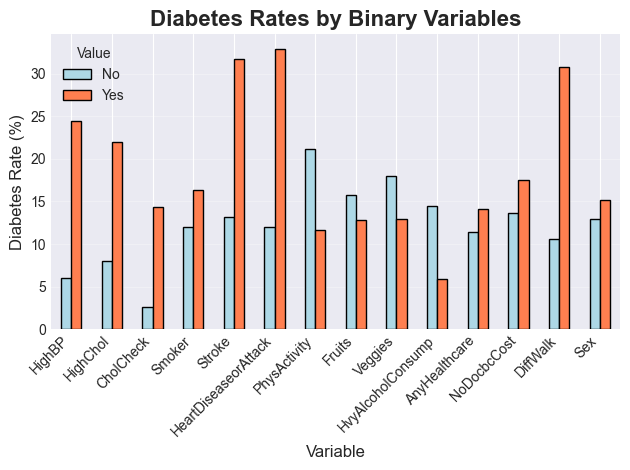

In [29]:
# Calculate diabetes rates for each binary column
diabetes_rates = {}
for col in binary_cols:
    crosstab = pd.crosstab(df[col], df['Diabetes_binary'], normalize='index')
    diabetes_rates[col] = crosstab[1] * 100  # Convert to percentage

# Create DataFrame for plotting
rate_df = pd.DataFrame(diabetes_rates).T

# Plot
plt.figure(figsize=(12, 6))
rate_df.plot(kind='bar', color=['lightblue', 'coral'], edgecolor='black')

plt.title('Diabetes Rates by Binary Variables', fontsize=16, fontweight='bold')

plt.xlabel('Variable', fontsize=12)
plt.ylabel('Diabetes Rate (%)', fontsize=12)

plt.legend(title='Value', labels=['No', 'Yes'])

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

### Correlation Analysis

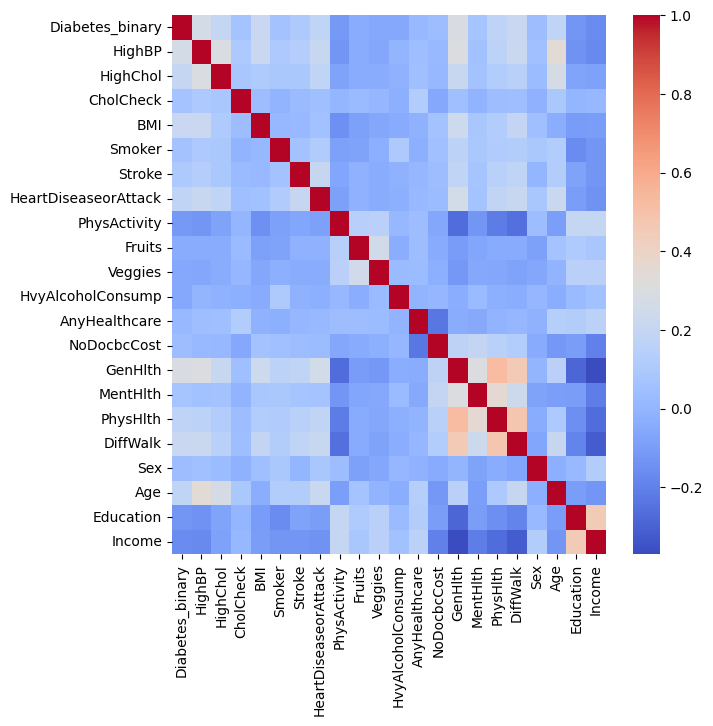

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

In [9]:
# top df.corr() columns
corr = df.corr()
top_corr = (
    corr["Diabetes_binary"]
    .drop("Diabetes_binary")
    .abs()
    .sort_values(ascending=False)
)

top_corr_list = top_corr.head(5).index.tolist() + ["Diabetes_binary"]

print(top_corr.head(5))

print(top_corr_list)

GenHlth     0.293569
HighBP      0.263129
DiffWalk    0.218344
BMI         0.216843
HighChol    0.200276
Name: Diabetes_binary, dtype: float64
['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Diabetes_binary']


## Based Model EDA

### Feature Importance 

In [11]:
from sklearn.ensemble import RandomForestClassifier

X = df[binary_cols]
y = df['Diabetes_binary']

rf = RandomForestClassifier(
    n_estimators=100,   
    random_state=42,
    max_depth=5,
    class_weight='balanced',
    n_jobs=-1           
)


rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


HighBP                  0.444735
HighChol                0.194066
DiffWalk                0.162178
HeartDiseaseorAttack    0.091864
PhysActivity            0.038993
CholCheck               0.018710
Stroke                  0.016193
HvyAlcoholConsump       0.015496
Smoker                  0.005287
Veggies                 0.004972
Sex                     0.004170
Fruits                  0.001885
NoDocbcCost             0.001022
AnyHealthcare           0.000428
dtype: float64

### Permutation Importance

In [13]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf, X, y,
    n_repeats=10,
    random_state=42,
    scoring='recall',
    n_jobs=-1
)

perm_imp = pd.Series(perm.importances_mean, index=X.columns)
perm_imp.sort_values(ascending=False)


HighBP                  0.150388
HighChol                0.066090
DiffWalk                0.021123
HeartDiseaseorAttack    0.010126
CholCheck               0.008550
HvyAlcoholConsump       0.005777
PhysActivity            0.003491
Sex                     0.001802
Smoker                  0.001137
Stroke                  0.001086
Fruits                  0.000269
AnyHealthcare           0.000000
NoDocbcCost            -0.000175
Veggies                -0.000334
dtype: float64

In [14]:
import shap

# 1. Create the explainer
explainer = shap.TreeExplainer(rf)

# 2. Calculate SHAP values
# For newer versions, just pass X. 
# If it's a classification task, shap_values might be a list.
shap_values = explainer.shap_values(X)

# 3. Check the shape
# If shap_values is a list (common in RandomForestClassifier):
print(type(shap_values)) 
# If it's a list, check the shape of the first class:
# print(shap_values[0].shape)

<class 'numpy.ndarray'>


In [16]:
print(shap_values.shape)

(253680, 14, 2)


(253680, 14)


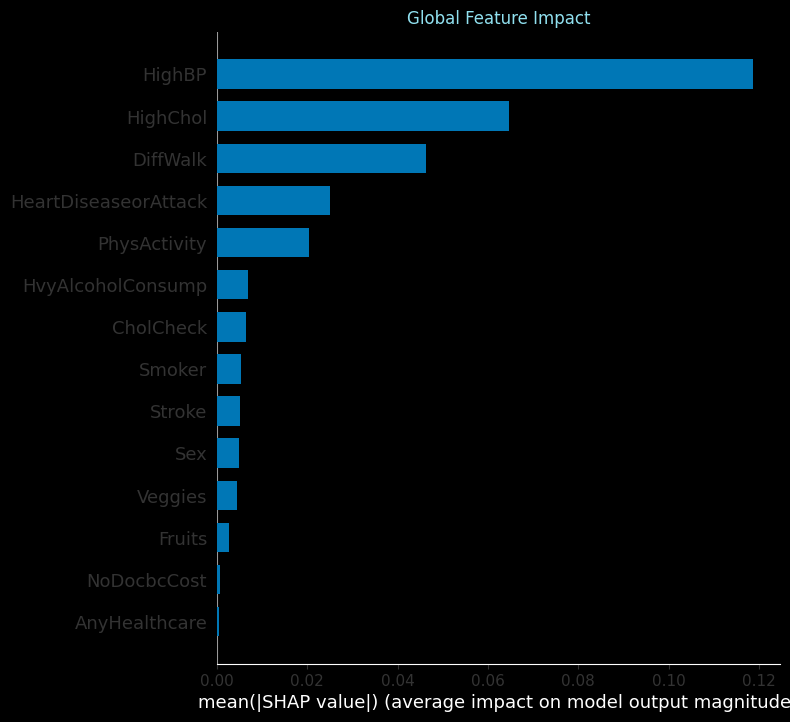

In [ ]:
shap_values_2d = shap_values[:, :, 1] 

print(shap_values_2d.shape)

plt.figure(figsize=(10, 6))

shap.summary_plot(shap_values_2d, X, plot_type="bar", color="#0077b6", show=False)

plt.title("Global Feature Impact", color='#90e0ef')
plt.show()

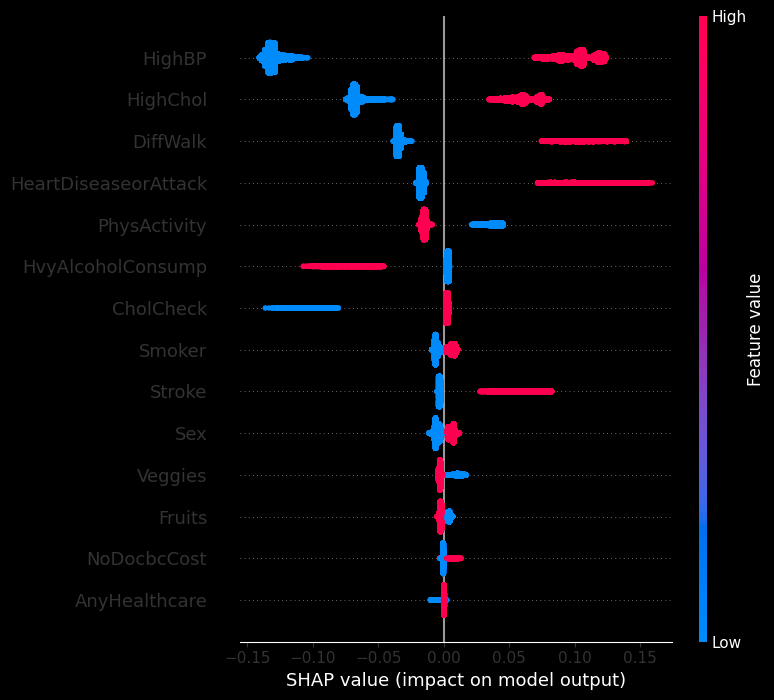

In [25]:
shap.summary_plot(shap_values_2d, X)

In [29]:
mean_shap = np.abs(shap_values_2d).mean(axis=0)

# 3. Create a DataFrame for easy sorting
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': mean_shap
}).sort_values(by='importance', ascending=False)

# 4. Select the Top 10
top_10_features = feature_importance.head(10)
print(top_10_features)

                 feature  importance
0                 HighBP    0.118729
1               HighChol    0.064709
12              DiffWalk    0.046306
5   HeartDiseaseorAttack    0.025044
6           PhysActivity    0.020301
9      HvyAlcoholConsump    0.006778
2              CholCheck    0.006349
3                 Smoker    0.005348
4                 Stroke    0.005028
13                   Sex    0.004895


### Feature Distribution

In [11]:
analysis_df = df_eda.groupby(['Sex', 'DiffWalk', 'HighChol']).agg({
    'Diabetes_binary': 'count',  
    'BMI': 'mean'                
}).reset_index()

analysis_df.columns = ['Sex', 'DiffWalk', 'HighChol', 'Total_Count', 'Avg_BMI']

print(analysis_df)

      Sex               DiffWalk             HighChol  Total_Count    Avg_BMI
0  Female     Difficulty Walking     High Cholesterol        15797  31.910996
1  Female     Difficulty Walking  No High Cholesterol        11398  31.133444
2  Female  No Difficulty Walking     High Cholesterol        42475  28.072254
3  Female  No Difficulty Walking  No High Cholesterol        72304  26.865540
4    Male     Difficulty Walking     High Cholesterol         9087  31.152195
5    Male     Difficulty Walking  No High Cholesterol         6393  30.153449
6    Male  No Difficulty Walking     High Cholesterol        40232  28.896475
7    Male  No Difficulty Walking  No High Cholesterol        55994  27.999643


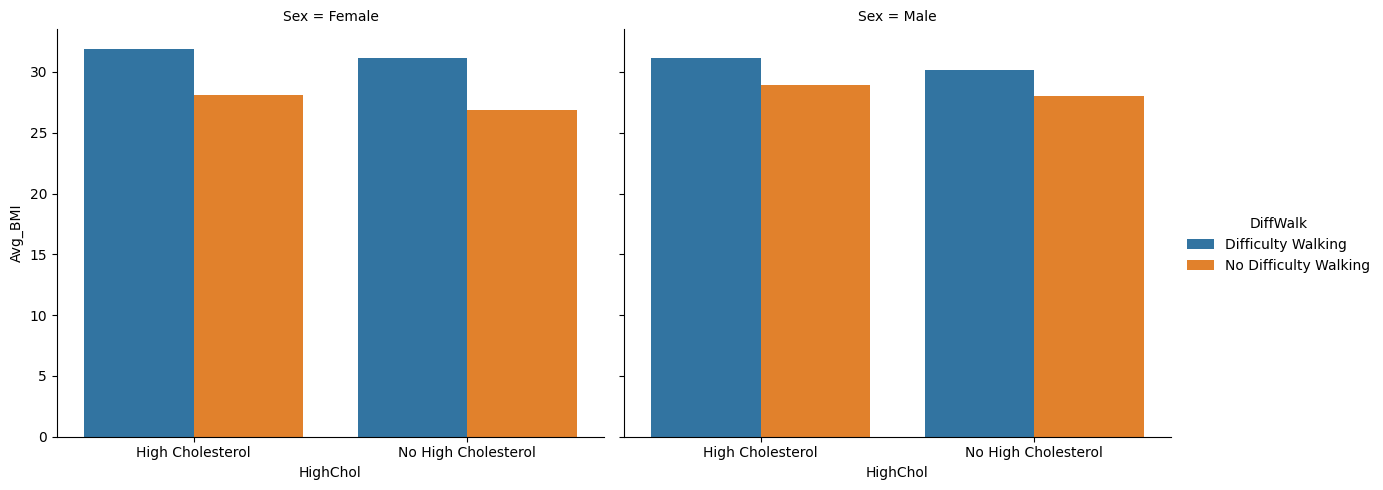

In [12]:
sns.catplot(
    data=analysis_df, 
    x='HighChol', 
    y='Avg_BMI', 
    hue='DiffWalk', 
    col='Sex', 
    kind='bar', 
    height=5, 
    aspect=1.2
)
plt.show()

In [13]:
analysis_df = df_eda.groupby(['Sex', 'GenHlth', 'HighBP']).agg({
    'Diabetes_binary': 'count',  
    'BMI': 'mean'                
}).reset_index()

analysis_df.columns = ['Sex', 'GenHlth', 'HighBP', 'Total_Count', 'Avg_BMI']

print(analysis_df)

       Sex    GenHlth      HighBP  Total_Count    Avg_BMI
0   Female  Excellent     High BP         4309  26.711070
1   Female  Excellent  No High BP        21246  24.660454
2   Female       Fair     High BP        11570  31.788245
3   Female       Fair  No High BP         6744  29.391014
4   Female       Good     High BP        20703  30.462252
5   Female       Good  No High BP        20669  28.430742
6   Female       Poor     High BP         4729  32.063650
7   Female       Poor  No High BP         2264  28.344081
8   Female  Very Good     High BP        16342  28.575266
9   Female  Very Good  No High BP        33398  26.579526
10    Male  Excellent     High BP         4840  27.931198
11    Male  Excellent  No High BP        14904  26.367485
12    Male       Fair     High BP         8973  31.131951
13    Male       Fair  No High BP         4283  28.806911
14    Male       Good     High BP        18209  30.458784
15    Male       Good  No High BP        16065  28.596452
16    Male    

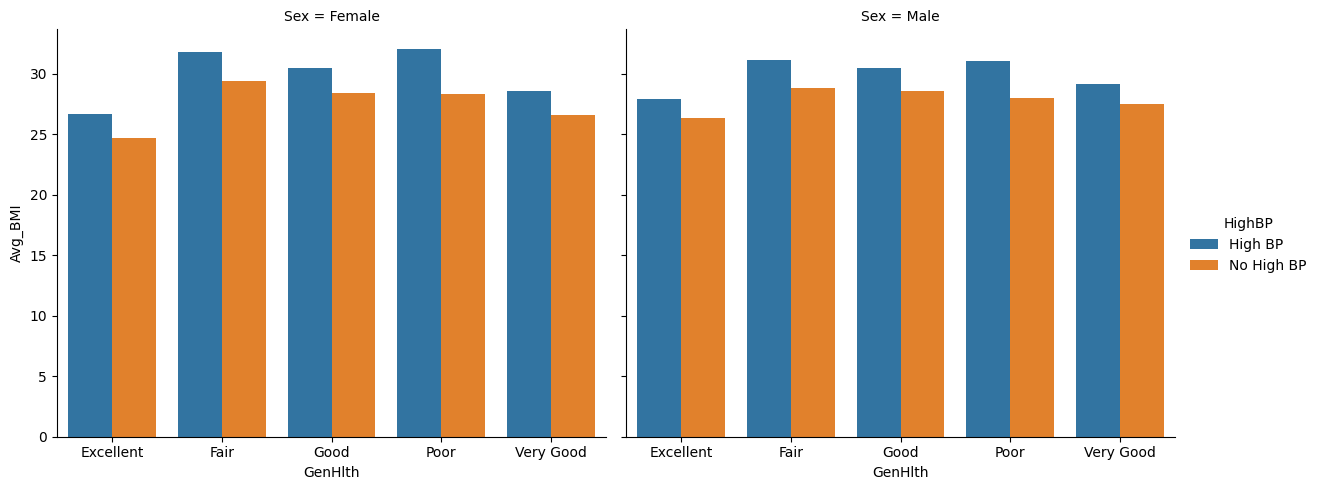

In [14]:
sns.catplot(
    data=analysis_df, 
    x='GenHlth', 
    y='Avg_BMI', 
    hue='HighBP', 
    col='Sex', 
    kind='bar', 
    height=5, 
    aspect=1.2
)
plt.show()

### Check Class Balance

In [15]:
print(df_eda.groupby("Diabetes_binary").size())

Diabetes_binary
Diabetes        35346
No Diabetes    218334
dtype: int64


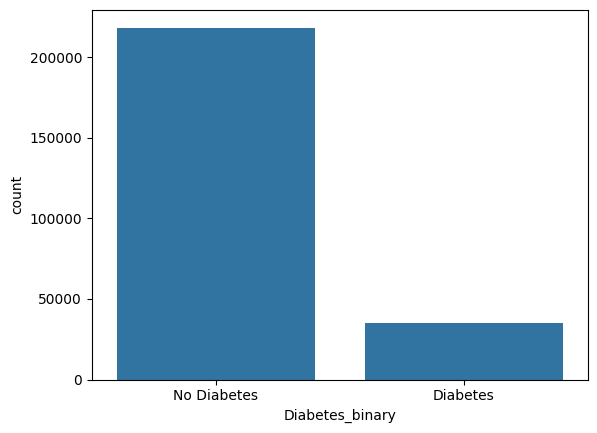

In [16]:
sns.countplot(x="Diabetes_binary", data=df_eda)
plt.show()

## Modeling Pipeline

### Import Libraries

In [5]:
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek

### Data splitting

In [32]:
all_features = ['HighBP', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 
                'PhysActivity', 'HvyAlcoholConsump', 'CholCheck', 
                'Smoker', 'Stroke', 'Sex', 'BMI', 'Age', 'Income', 
                'GenHlth', 'MentHlth', 'PhysHlth', 'Education']

# Define which of these are numeric (should be scaled)
numeric_features = ['BMI', 'Age', 'Income', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education']

# Define categorical features (won't be scaled)
categorical_features = ['HighBP', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack', 
                       'PhysActivity', 'HvyAlcoholConsump', 'CholCheck', 
                       'Smoker', 'Stroke', 'Sex']

# Split the data with ALL features
X_train, X_test, y_train, y_test = train_test_split(
    df[all_features],
    df['Diabetes_binary'],
    test_size=0.2,
    random_state=42,
    stratify=df['Diabetes_binary']
)



### Pipeline Function for Multiple Models

In [28]:
def create_pipeline(model, needs_scaler=False):
    """
    Creates a proper pipeline with optional scaling for numeric columns only,
    using imbalanced-learn's Pipeline to handle SMOTETomek.
    """
    steps = []
    
    if needs_scaler:
        # Create a column transformer that scales only numeric features
        # Make sure numeric_features is defined in your scope
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
            ],
            remainder='passthrough'  # Important: pass through non-numeric columns
        )
        steps.append(('preprocessor', preprocessor))
    
    # Add SMOTETomek - this requires imbalanced-learn's Pipeline
    steps.append(('smote_tomek', SMOTETomek(random_state=42)))
    
    # Add the model
    steps.append(('model', model))
    
    # Use imbalanced-learn's Pipeline to handle the resampler
    return ImbPipeline(steps)

## Benchmark

### Import Libraries

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)

### Models Dictionary

In [18]:
xgb_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

models = {
    "Logistic Regression": (
        LogisticRegression(
            max_iter=1000,
            # class_weight={0: 1, 1: 6},
            random_state=42
        ),
        True
    ),
    
    "SVC": (
        LinearSVC(
            # class_weight={0: 1, 1: 6},
            random_state=42,
            max_iter=3000,
        ),
        True
    ),
    
    "Decision Tree": (
        DecisionTreeClassifier(
            max_depth=15,
            # class_weight={0: 1, 1: 6},
            random_state=42
        ),
        False
    ),
    
    "Random Forest": (
        RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            # class_weight={0: 1, 1: 6},
            n_jobs=-1,
            random_state=42
        ),
        False
    ),
    
    "XGBoost": (
        XGBClassifier(
            n_estimators=300,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            scale_pos_weight=xgb_pos_weight,
            eval_metric="logloss",
            random_state=42
        ),
        False
    )
}


### Evaluation

In [29]:
results = []
trained_pipelines = {}

for name, (model, needs_scaler) in models.items():  # UNPACK the tuple here!
    print(f"Training {name} ...")
    
    # Pass model and needs_scaler separately
    pipeline = create_pipeline(model, needs_scaler)  # Add needs_scaler parameter
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    # some models use decision_function instead of predict_proba
    if hasattr(pipeline, "predict_proba"):
        y_score = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_score = pipeline.decision_function(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_score)
    })
    
    trained_pipelines[name] = pipeline



Training Logistic Regression ...
Training SVC ...
Training Decision Tree ...
Training Random Forest ...
Training XGBoost ...


### Results

In [30]:
benchmark_df = (
    pd.DataFrame(results)
    .sort_values(by="ROC_AUC", ascending=False)
)

benchmark_df

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,SVC,1.0,1.0,1.0,1.0,1.0
2,Decision Tree,1.0,1.0,1.0,1.0,1.0
3,Random Forest,1.0,1.0,1.0,1.0,1.0
4,XGBoost,1.0,1.0,1.0,1.0,1.0


In [31]:
print(benchmark_df)

                 Model  Accuracy  Precision  Recall   F1  ROC_AUC
0  Logistic Regression       1.0        1.0     1.0  1.0      1.0
1                  SVC       1.0        1.0     1.0  1.0      1.0
2        Decision Tree       1.0        1.0     1.0  1.0      1.0
3        Random Forest       1.0        1.0     1.0  1.0      1.0
4              XGBoost       1.0        1.0     1.0  1.0      1.0


### Benchmark Visualization

#### All Metrics Bar

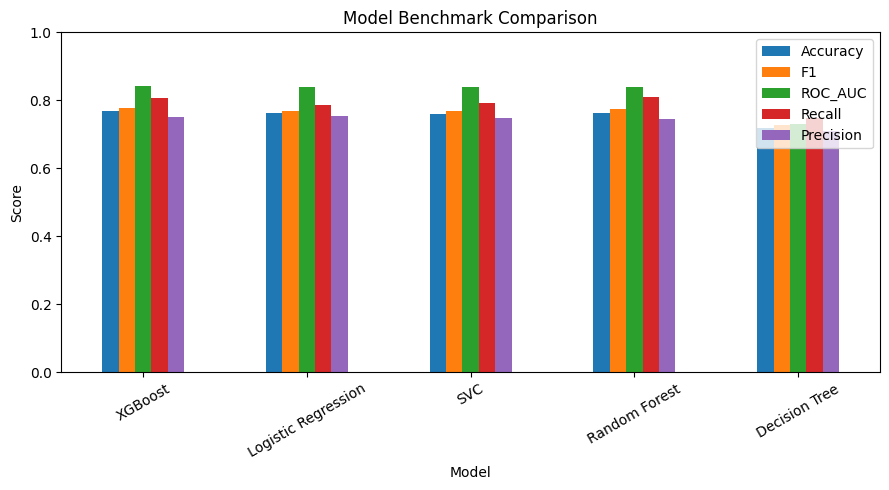

In [21]:
benchmark_df.set_index("Model")[["Accuracy", "F1", "ROC_AUC","Recall", "Precision"]].plot.bar(
    figsize=(9, 5)
)

plt.title("Model Benchmark Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
# change the legend position 
plt.legend
plt.show()

#### Heatmap

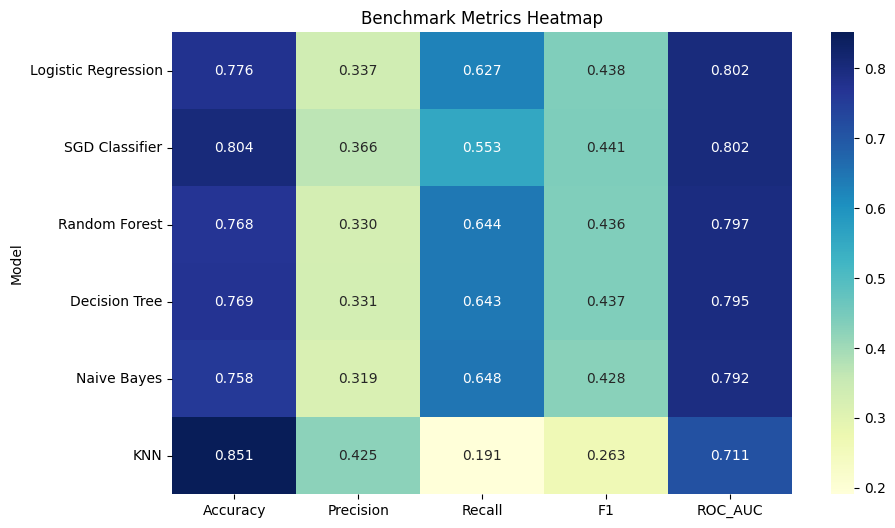

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    benchmark_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]],
    annot=True, fmt=".3f", cmap="YlGnBu"
)
plt.title("Benchmark Metrics Heatmap")
plt.show()


#### ROC Curve

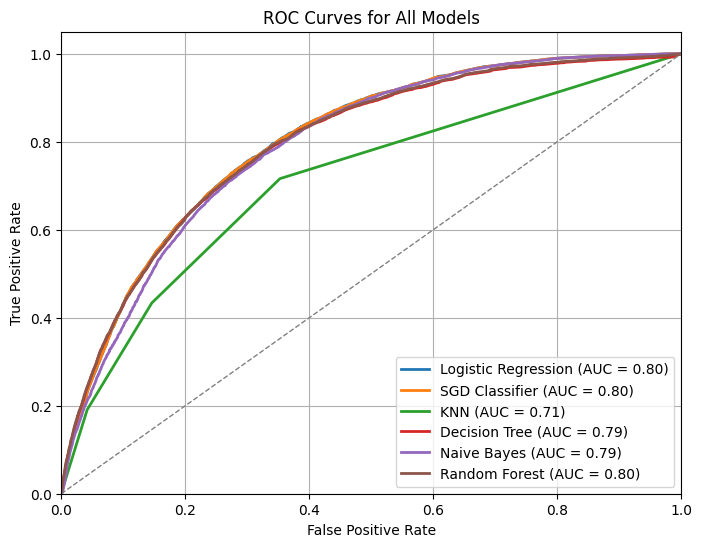

In [ ]:
plt.figure(figsize=(8, 6))

for name, pipeline in trained_pipelines.items():
    y_score = pipeline.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Enhance the XGboost model

In [33]:
# =========================================================
# 1️⃣ Imports
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna

from xgboost import XGBClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)

from imblearn.pipeline import Pipeline as ImbPipeline


# =========================================================
# 2️⃣ Features
# =========================================================
all_features = [
    'HighBP', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack',
    'PhysActivity', 'HvyAlcoholConsump', 'CholCheck',
    'Smoker', 'Stroke', 'Sex', 'BMI', 'Age', 'Income',
    'GenHlth', 'MentHlth', 'PhysHlth', 'Education'
]

numeric_features = [
    'BMI', 'Age', 'Income', 'GenHlth',
    'MentHlth', 'PhysHlth', 'Education'
]


# =========================================================
# 3️⃣ scale_pos_weight
# =========================================================
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()


# =========================================================
# 4️⃣ Preprocessor
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)


# =========================================================
# 5️⃣ Optuna Objective (AUC-PR + CV)
# =========================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 800, 1400),
        "max_depth": trial.suggest_int("max_depth", 2, 4),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
        "subsample": trial.suggest_float("subsample", 0.7, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 0.9),
        "min_child_weight": trial.suggest_int("min_child_weight", 3, 10),
        "gamma": trial.suggest_float("gamma", 0.1, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 2.0)
    }

    model = XGBClassifier(
        objective="binary:logistic",
        eval_metric="aucpr",
        tree_method="hist",
        scale_pos_weight=pos_weight,
        random_state=42,
        n_jobs=-1,
        **params
    )

    pipe = ImbPipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    scores = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        pipe.fit(X_tr[all_features], y_tr)
        y_prob = pipe.predict_proba(X_val[all_features])[:, 1]
        scores.append(average_precision_score(y_val, y_prob))

    return np.mean(scores)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

best_params = study.best_params
print("Best params:", best_params)


# =========================================================
# 6️⃣ Train Final Model
# =========================================================
final_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",
    tree_method="hist",
    scale_pos_weight=pos_weight,
    random_state=42,
    n_jobs=-1,
    **best_params
)

final_pipe = ImbPipeline([
    ("prep", preprocessor),
    ("model", final_model)
])

final_pipe.fit(X_train[all_features], y_train)


# =========================================================
# 7️⃣ Probability Calibration (BIG PLUS)
# =========================================================
calibrated = CalibratedClassifierCV(
    final_pipe, method="isotonic", cv=3
)
calibrated.fit(X_train[all_features], y_train)

y_proba = calibrated.predict_proba(X_test[all_features])[:, 1]


# =========================================================
# 8️⃣ Threshold Optimization (F2 – medical)
# =========================================================
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

f2_scores = (1 + 2**2) * (precision * recall) / ((2**2 * precision) + recall + 1e-9)
best_threshold = thresholds[np.argmax(f2_scores)]

y_pred = (y_proba >= best_threshold).astype(int)


# =========================================================
# 9️⃣ Results DataFrame
# =========================================================
results_df = pd.DataFrame([{
    "Model": "XGBoost (Medical++ Optimized)",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "F2": fbeta_score(y_test, y_pred, beta=2),
    "ROC_AUC": roc_auc_score(y_test, y_proba),
    "PR_AUC": average_precision_score(y_test, y_proba),
    "Optimal_Threshold": best_threshold
}])

print(results_df)




[I 2026-02-10 14:16:11,401] A new study created in memory with name: no-name-6bb3296f-b42b-4e9b-a466-2b2d382a43e7
[I 2026-02-10 14:16:37,335] Trial 0 finished with value: 0.4354388742073888 and parameters: {'n_estimators': 1213, 'max_depth': 4, 'learning_rate': 0.04095333610928314, 'subsample': 0.7080806160944888, 'colsample_bytree': 0.7232806344688039, 'min_child_weight': 7, 'gamma': 0.29346641857021394, 'reg_alpha': 0.7971136478240374, 'reg_lambda': 1.4428207297433278}. Best is trial 0 with value: 0.4354388742073888.
[I 2026-02-10 14:16:51,532] Trial 1 finished with value: 0.4328654935758733 and parameters: {'n_estimators': 908, 'max_depth': 2, 'learning_rate': 0.02072329856132716, 'subsample': 0.8989248761859105, 'colsample_bytree': 0.8934879018047446, 'min_child_weight': 3, 'gamma': 0.9700002315805807, 'reg_alpha': 0.6020634127121842, 'reg_lambda': 1.1003830303814734}. Best is trial 0 with value: 0.4354388742073888.
[I 2026-02-10 14:17:12,286] Trial 2 finished with value: 0.4362474

Best params: {'n_estimators': 1111, 'max_depth': 4, 'learning_rate': 0.015964350469759612, 'subsample': 0.7952769499654873, 'colsample_bytree': 0.8194800680643131, 'min_child_weight': 6, 'gamma': 0.6277303699002982, 'reg_alpha': 0.3055190990541467, 'reg_lambda': 1.229920727738415}
                           Model  Accuracy  Precision    Recall        F1  \
0  XGBoost (Medical++ Optimized)  0.681626   0.284125  0.845664  0.425344   

         F2   ROC_AUC    PR_AUC  Optimal_Threshold  
0  0.606091  0.827394  0.422962           0.117866  


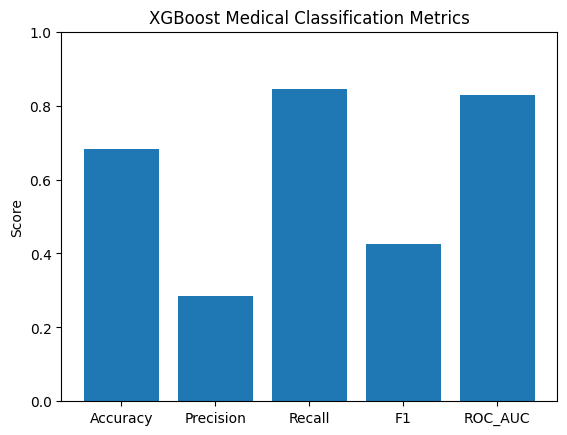

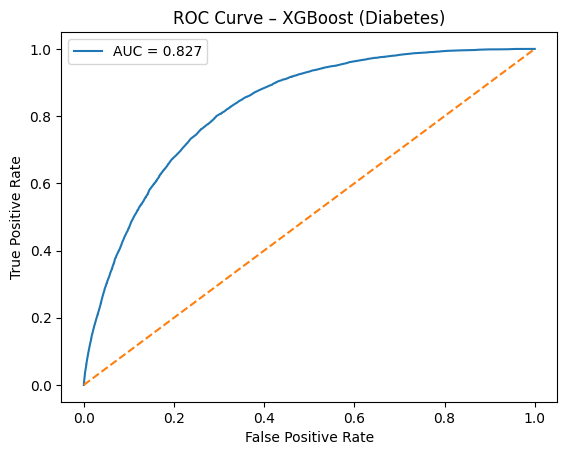

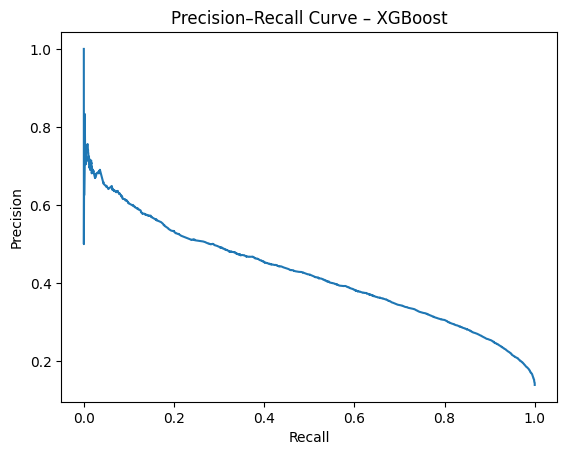

NameError: name 'F1' is not defined

<Figure size 640x480 with 0 Axes>

In [34]:

# =========================================================
# 🔟 Visualization – Metrics Bar Plot
# =========================================================
metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]
values = results_df.loc[0, metrics]

plt.figure()
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("XGBoost Medical Classification Metrics")
plt.ylabel("Score")
plt.show()


# =========================================================
# 1️⃣1️⃣ Visualization – ROC Curve
# =========================================================
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {results_df.loc[0,'ROC_AUC']:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost (Diabetes)")
plt.legend()
plt.show()


# =========================================================
# 1️⃣2️⃣ Visualization – Precision Recall Curve
# =========================================================
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – XGBoost")
plt.show()


# =========================================================
# 1️⃣3️⃣ Visualization – F1 vs Threshold
# =========================================================
plt.figure()
plt.plot(thresholds, F1[:-1])
plt.axvline(best_threshold, linestyle='--')
plt.xlabel("Decision Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.show()



# Export the Model

In [13]:
import joblib

bundle = {
    "model": calibrated,      # your pipeline + calibrated classifier
    "threshold": float(best_threshold),
    "features": all_features,
    "model_name": "Diabetes_XGBoost",
    "version": "1.0.0"
}

joblib.dump(bundle, r"../model/diabetes_bundle.pkl")
print("✅ Model bundle exported successfully")

✅ Model bundle exported successfully
